[*********************100%%**********************]  1 of 1 completed


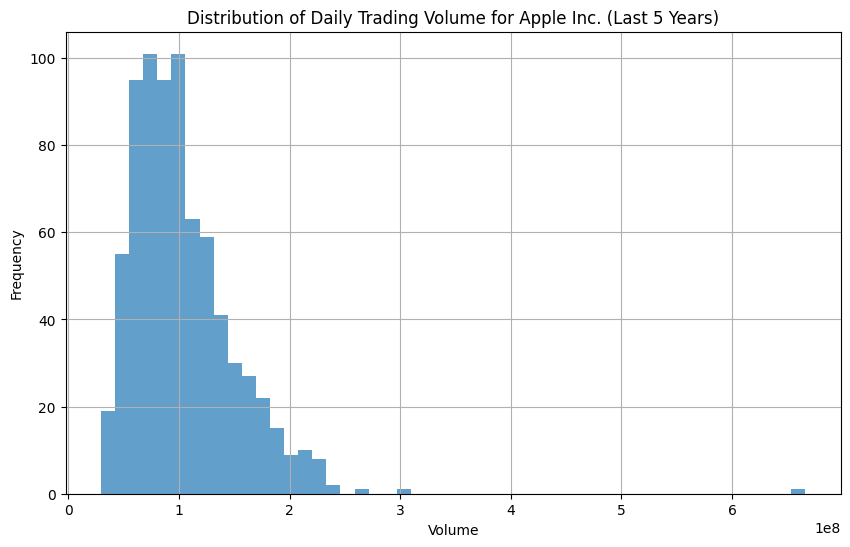

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data for the last 5 years
apple_data = yf.download('TSLA', period='3y')

# Plotting the volume distribution
plt.figure(figsize=(10, 6))
plt.hist(apple_data['Volume'], bins=50, alpha=0.7)
plt.title('Distribution of Daily Trading Volume for Apple Inc. (Last 5 Years)')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


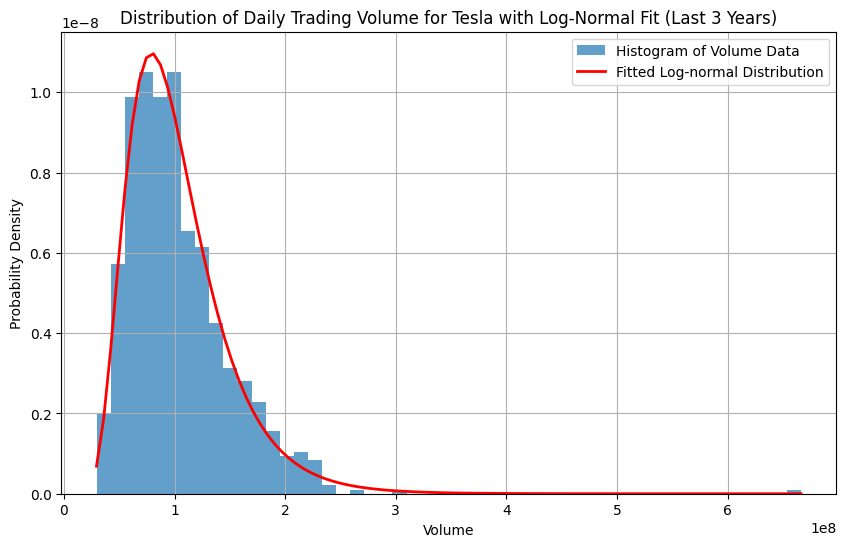

In [1]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Download Apple's stock data for the past 5 years
apple_data = yf.download('TSLA', period='3y')

# Extract the 'Volume' data
volume_data = apple_data['Volume'].values

# Fit a log-normal distribution to the volume data
shape, loc, scale = stats.lognorm.fit(volume_data, floc=0)

# Create a range for the x values
xmin, xmax = volume_data.min(), volume_data.max()
x = np.linspace(xmin, xmax, 100)

# Calculate the PDF of the fitted log-normal distribution
pdf = stats.lognorm.pdf(x, shape, loc=0, scale=scale)

# Plot the histogram of the volume data
plt.figure(figsize=(10, 6))
plt.hist(volume_data, bins=50, alpha=0.7, density=True, label='Histogram of Volume Data')

# Plot the fitted log-normal distribution
plt.plot(x, pdf, 'r', linewidth=2, label='Fitted Log-normal Distribution')
plt.title('Distribution of Daily Trading Volume for Tesla with Log-Normal Fit (Last 3 Years)')
plt.xlabel('Volume')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
K-S statistic: 0.023151216649411388
P-value: 0.8048163997296891


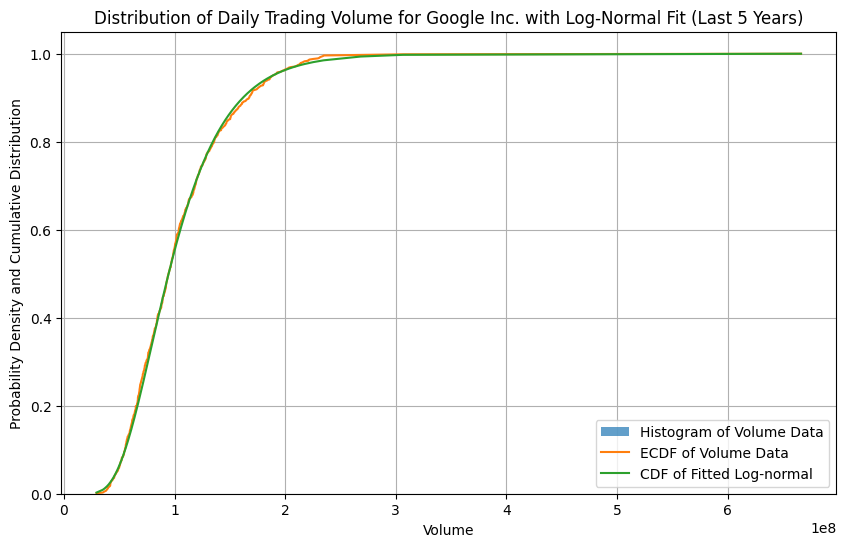

The distribution of the data is not significantly different from a log-normal distribution.


In [22]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Download Tesla's stock data for the past 5 years
google_data = yf.download('TSLA', period='3y')

# Extract the 'Volume' data
volume_data = google_data['Volume'].values

# Fit a log-normal distribution to the volume data
shape, loc, scale = stats.lognorm.fit(volume_data, floc=0)

# Generate the CDF of the fitted log-normal distribution
sorted_volume_data = np.sort(volume_data)
cdf_fitted = stats.lognorm.cdf(sorted_volume_data, shape, loc=0, scale=scale)

# Calculate the ECDF of the volume data
ecdf = ECDF(volume_data)
y_ecdf = ecdf(sorted_volume_data)

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(volume_data, 'lognorm', args=(shape, 0, scale))

print(f"K-S statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Create a range for the x values
xmin, xmax = volume_data.min(), volume_data.max()
x = np.linspace(xmin, xmax, 100)

# Calculate the PDF of the fitted log-normal distribution
pdf = stats.lognorm.pdf(x, shape, loc=0, scale=scale)

# Plot the histogram of the volume data
plt.figure(figsize=(10, 6))
plt.hist(volume_data, bins=50, alpha=0.7, density=True, label='Histogram of Volume Data')

# Add CDF and ECDF plots
plt.plot(sorted_volume_data, y_ecdf, label='ECDF of Volume Data')
plt.plot(sorted_volume_data, cdf_fitted, label='CDF of Fitted Log-normal')

plt.title('Distribution of Daily Trading Volume for Google Inc. with Log-Normal Fit (Last 5 Years)')
plt.xlabel('Volume')
plt.ylabel('Probability Density and Cumulative Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Interpret the p-value
if p_value > 0.05:
    print("The distribution of the data is not significantly different from a log-normal distribution.")
else:
    print("The distribution of the data is significantly different from a log-normal distribution.")
